In [ ]:
pip install mediapipe opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 44.7 MB/s eta 0:00:00


In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

In [ ]:
 # Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

In [ ]:
# Function to calculate Step Length
def calculate_step_length(heel_current, heel_previous):
    return np.sqrt((heel_current[0] - heel_previous[0])**2 + (heel_current[1] - heel_previous[1])**2)

In [ ]:
import numpy as np

In [ ]:
image = cv2.imread('/content/img_lab.jpg')

In [ ]:
# Converting the image to RGB for MediaPipe processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Processing the image to extract pose landmarks
pose.process(image_rgb)

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
result = pose.process(image_rgb)


In [ ]:
result.pose_landmarks

landmark {
  x: 0.62038064
  y: 0.314657509
  z: -0.371305019
  visibility: 0.999962091
}
landmark {
  x: 0.627168238
  y: 0.303755343
  z: -0.349226266
  visibility: 0.999834239
}
landmark {
  x: 0.632064283
  y: 0.303589463
  z: -0.349280924
  visibility: 0.999840319
}
landmark {
  x: 0.635715127
  y: 0.303502381
  z: -0.349248976
  visibility: 0.99982655
}
landmark {
  x: 0.611225247
  y: 0.304542482
  z: -0.351505369
  visibility: 0.999784827
}
landmark {
  x: 0.60543716
  y: 0.304890573
  z: -0.351501733
  visibility: 0.999779344
}
landmark {
  x: 0.599855781
  y: 0.305519819
  z: -0.351567328
  visibility: 0.999742806
}
landmark {
  x: 0.641513228
  y: 0.307762712
  z: -0.207882941
  visibility: 0.999664426
}
landmark {
  x: 0.593017399
  y: 0.311246753
  z: -0.220333844
  visibility: 0.99942
}
landmark {
  x: 0.629713655
  y: 0.325275421
  z: -0.317272276
  visibility: 0.999957681
}
landmark {
  x: 0.610770106
  y: 0.326138049
  z: -0.320812404
  visibility: 0.99994278
}
landmar

In [ ]:
(result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x,
                 result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y)

(0.636491060256958, 0.7132261395454407)

In [ ]:

 (result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x,
                  result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y)

(0.5937696099281311, 0.7081893086433411)

In [ ]:
left_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x,
              result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y)

right_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x,
              result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y)



In [ ]:
image.shape

(1280, 960, 3)

In [ ]:
image_height, image_width, _ = image.shape

In [ ]:
(left_heel[0] * image_width, left_heel[1] * image_height)

(611.0314178466797, 912.9294586181641)

In [ ]:
(right_heel[0] * image_width, right_heel[1] * image_height)


(570.0188255310059, 906.4823150634766)

In [ ]:
import math


right_heel = (570.0188255310059, 906.4823150634766)
left_heel = (611.0314178466797, 912.9294586181641)

step_length_pixels = math.sqrt(
    (left_heel[0] - right_heel[0])**2 + (left_heel[1] - right_heel[1])**2
)
step_length_pixels

41.5162424656473

In [ ]:
calculate_step_length(left_heel, right_heel)

41.5162424656473

Step Length is 41.41832949910766 (in pixels)


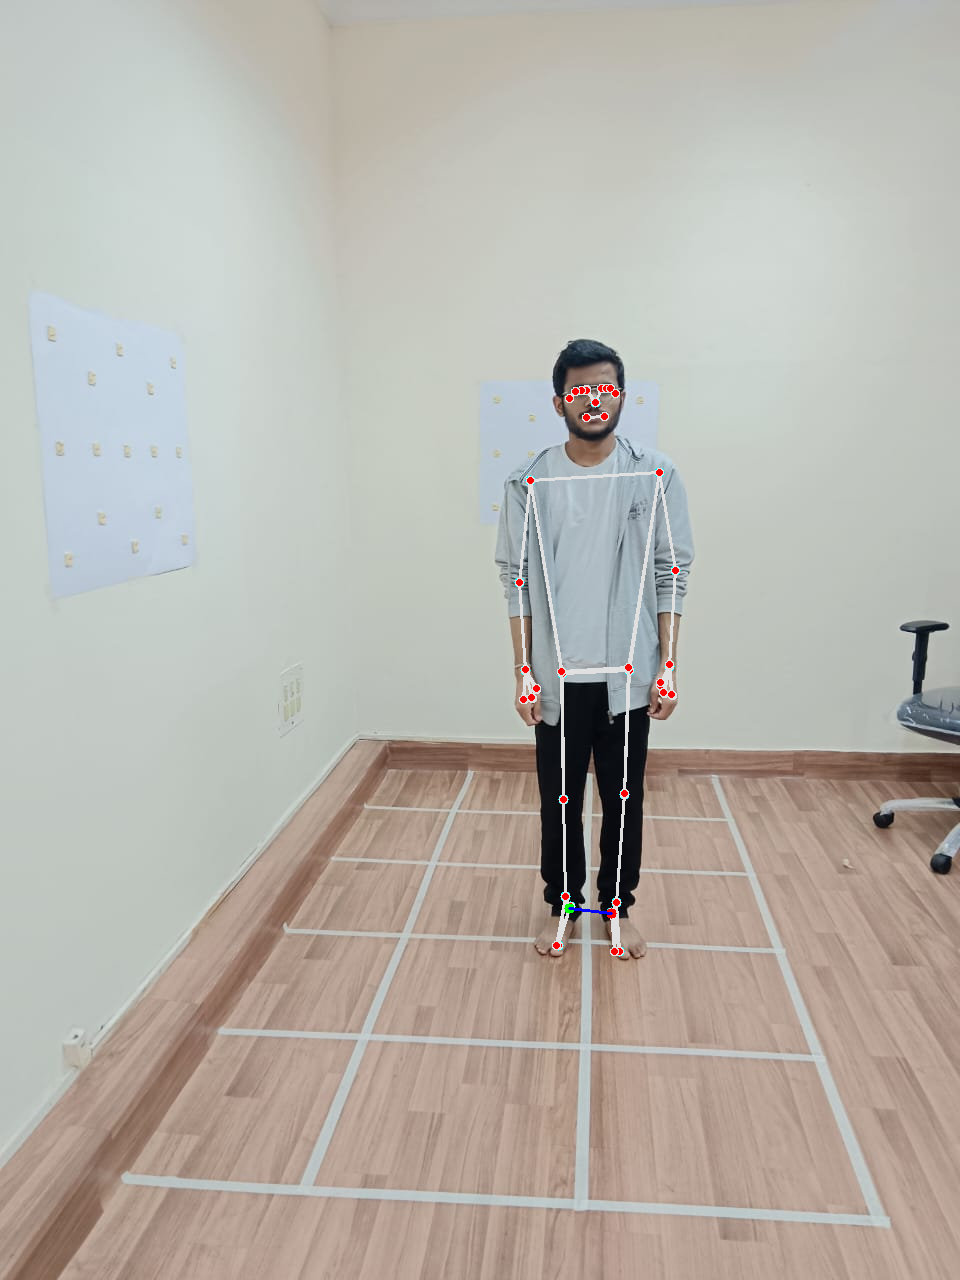

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

result = pose.process(image_rgb)

def calculate_step_length(heel_current, heel_previous):
    return np.sqrt((heel_current[0] - heel_previous[0])**2 + (heel_current[1] - heel_previous[1])**2)


# Check if landmarks are detected
if result.pose_landmarks:
    # Draw landmarks on the image for visualization
    mp_draw.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Extract keypoints for left and right heels
    left_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x,
                 result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y)

    right_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x,
                  result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y)








    # Convert coordinates back to pixel values
    image_height, image_width, _ = image.shape
    left_heel_pixel = (left_heel[0] * image_width, left_heel[1] * image_height)
    right_heel_pixel = (right_heel[0] * image_width, right_heel[1] * image_height)

    step_length = calculate_step_length(left_heel_pixel, right_heel_pixel)
    print(f'Step Length is {step_length} (in pixels)')



    # Draw the keypoints and step length on the image
    cv2.circle(image, (int(left_heel_pixel[0]), int(left_heel_pixel[1])), 5, (0, 0, 255), -1)
    cv2.circle(image, (int(right_heel_pixel[0]), int(right_heel_pixel[1])), 5, (0, 255, 0), -1)
    cv2.line(image, (int(left_heel_pixel[0]), int(left_heel_pixel[1])),
             (int(right_heel_pixel[0]), int(right_heel_pixel[1])), (255, 0, 0), 2)

    # Display the image with keypoints and lines using cv2_imshow in Colab


    cv2_imshow(image)
else:
    print("Landmarks pts NOT founfd.")


* Blue line is the step length in pixel,
by calculations we get step length = 41.51

* But we wants step length in cm, because from actual GAITright system we get step length in cm.

* How to convert pixel into the cm??



In [ ]:
# Excluded Unwanted Points

Step Length is 42.2965719651132 (in pixels)


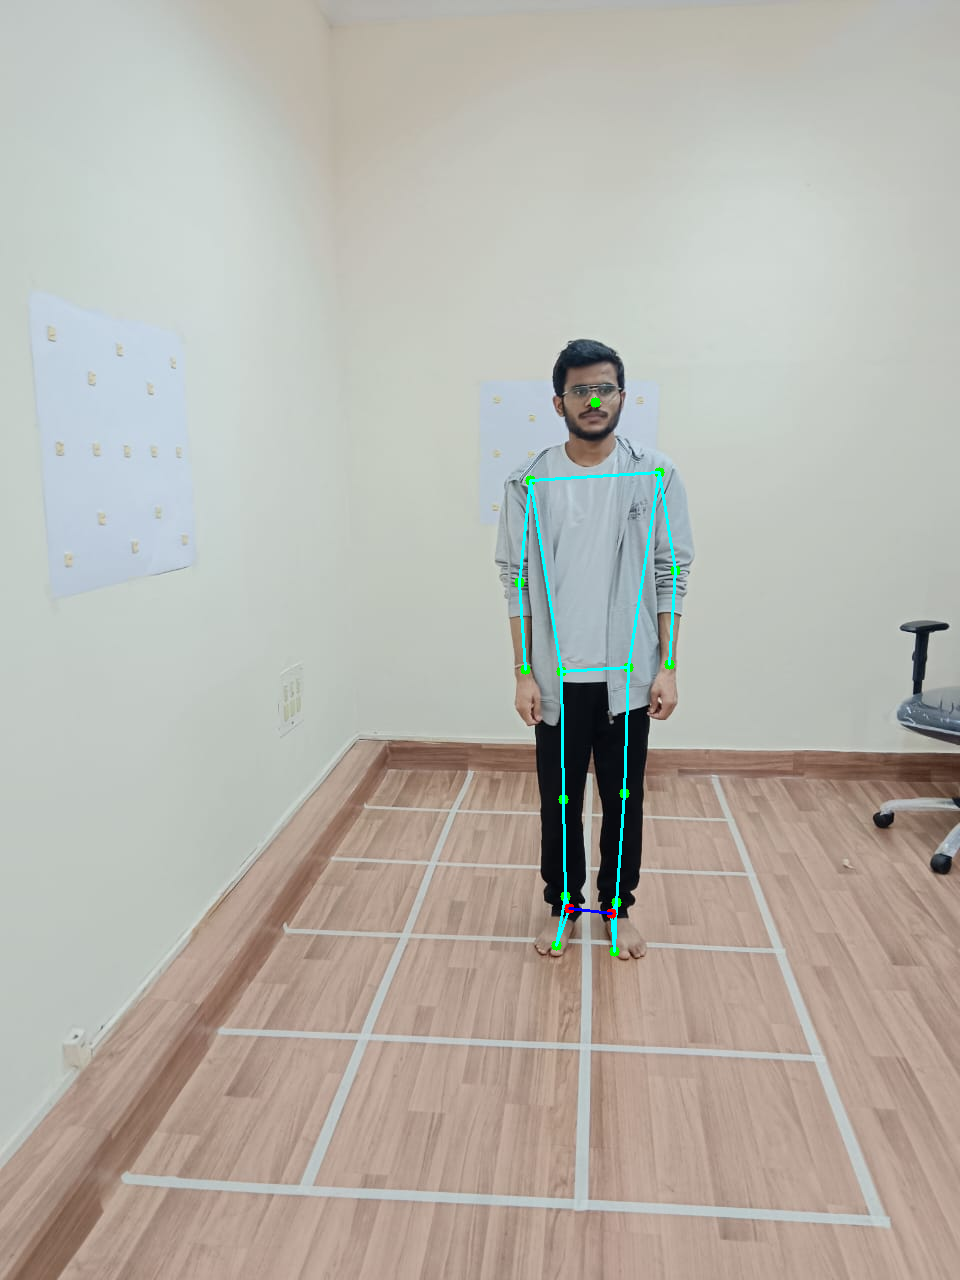

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

# Excluded landmarks
excluded_points = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 22]

def calculate_step_length(heel_current, heel_previous):
    return np.sqrt((heel_current[0] - heel_previous[0])**2 + (heel_current[1] - heel_previous[1])**2)

# Create custom drawing specs
drawing_spec = mp_draw.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)

# Load the image here ---------------------------------------------
image = cv2.imread('/content/img_lab.jpg')
# -----------------------------------------------------------------

# Now 'image' is a NumPy array and you can use its 'shape' attribute.
# Convert BGR to RGB before processing with mediapipe
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = pose.process(image_rgb)



if result.pose_landmarks:

    landmarks_location = result.pose_landmarks

    # Draw filtered landmarks
    for idx, landmark in enumerate(landmarks_location.landmark):
        if idx not in excluded_points:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

    # Draw connections between non-excluded landmarks
    for connection in mp_pose.POSE_CONNECTIONS:
        if connection[0] not in excluded_points and connection[1] not in excluded_points:
            start_point = landmarks_location.landmark[connection[0]]
            end_point = landmarks_location.landmark[connection[1]]

            start_coords = (int(start_point.x * image.shape[1]), int(start_point.y * image.shape[0]))
            end_coords = (int(end_point.x * image.shape[1]), int(end_point.y * image.shape[0]))

            cv2.line(image, start_coords, end_coords, (255, 255, 0), 2)

    # Extract heel keypoints
    left_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x,
                 result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y)
    right_heel = (result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x,
                  result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y)

    # Convert coordinates to pixels
    image_height, image_width, _ = image.shape
    left_heel_pixel = (int(left_heel[0] * image_width), int(left_heel[1] * image_height))
    right_heel_pixel = (int(right_heel[0] * image_width), int(right_heel[1] * image_height))

    step_length = calculate_step_length(left_heel_pixel, right_heel_pixel)
    print(f'Step Length is {step_length} (in pixels)')

    # Draw heel points and connection
    cv2.circle(image, left_heel_pixel, 5, (0, 0, 255), -1)
    cv2.circle(image, right_heel_pixel, 5, (0, 0, 255), -1)
    cv2.line(image, left_heel_pixel, right_heel_pixel, (255, 0, 0), 2)

    cv2_imshow(image)
else:
    print("Landmarks pts NOT found.")

pose.close()